In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [162]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [163]:
start_page = '&page=8'

In [164]:
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [165]:
reply_list = soup.select_one('.score_result').find_all('li')
len(reply_list)

10

In [166]:
star_score = int(reply_list[0].select_one('.star_score').get_text().strip())
star_score

1

In [169]:
len(reply_list[3].find_all('span'))

10

In [47]:
time = reply_list[0].find('dt').get_text().split('\n')[-2].split(' ')[0]
time

'2020.10.21'

In [10]:
sym = int(reply_list[0].select_one('.btn_area').find_all('strong')[0].get_text())
nonsym = int(reply_list[0].select_one('.btn_area').find_all('strong')[1].get_text())
sym,nonsym


(1509, 280)

In [48]:
star_score_list = []; contents_list = []; time_list = []
sym_list = []; nonsym_list = []
for reply in reply_list:
    star_score = int(reply.select_one('.star_score').get_text().strip())
    contents = reply.find_all('span')[3].get_text().strip()
    time = reply.find('dt').get_text().split('\n')[-2].split(' ')[0]
    sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
    nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
    star_score_list.append(star_score)
    contents_list.append(contents)
    time_list.append(time)
    sym_list.append(sym)
    nonsym_list.append(nonsym)

In [12]:
import pandas as pd

In [49]:
df = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df

,별점,내용,작성일,공감,비공감
0,2,shin****,2020.10.21,10,22
1,1,기주로(vksa****),2020.10.21,7,20
2,1,광주변재은(time****),2020.10.21,2,17
3,1,Pinkarea(urev****),2020.10.21,6,24
4,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020.10.23,17,36
5,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020.11.02,13,37
6,10,유아인 연기 개잘햇 진짜,2020.10.31,7,41
7,8,네이버평점이랑 관람평 보고 예약했는데 그리 재밌진 않았어요 약간 꼴페미 스러운게 있...,2020.10.29,46,127


In [14]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
total

6048

In [15]:
end_page = (total // 10) + 1
end_page

605

In [90]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [91]:
start_page = '&page=1'
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [92]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
end_page = (total // 10) + 1

In [93]:
from tqdm import tqdm_notebook

In [170]:
star_score_list = []; contents_list = []; time_list = []
sym_list = []; nonsym_list = []
for i in tqdm_notebook(range(end_page)):
    page = f'&page={i + 1}'
    html = urlopen(url_base + iframe + page)
    soup = BeautifulSoup(html, 'html.parser')
    reply_list = soup.select_one('.score_result').find_all('li')
    for reply in reply_list:
        star_score = int(reply.select_one('.star_score').get_text().strip())
        time = reply.find('dt').get_text().split('\n')[-2].split(' ')[0]
        sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
        nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
        spans = reply.find_all('span')
        if len(spans) == 9:
            contents = reply.find_all('span')[3].get_text().strip()
        elif len(spans) == 8:
            contents = reply.find_all('span')[2].get_text().strip()
        else: 
            contents = ''
        star_score_list.append(star_score)
        contents_list.append(contents)
        time_list.append(time)
        sym_list.append(sym)
        nonsym_list.append(nonsym)

In [171]:
df2 = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df2

,별점,내용,작성일,공감,비공감
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020.10.21,1509,280
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020.10.21,1339,235
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020.10.21,1195,229
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020.10.21,1036,208
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020.10.21,930,195
...,...,...,...,...,...
6045,1,역겨운 페미영화,2020.10.21,7,20
6046,1,여자는 집에서 아기나생산하고 설거지나해ㅋ,2020.10.21,2,17
6047,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020.10.21,6,24
6048,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020.10.23,17,36


In [172]:
df2.to_csv('Movie_reply.csv', sep=',',encoding='utf8')

In [155]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

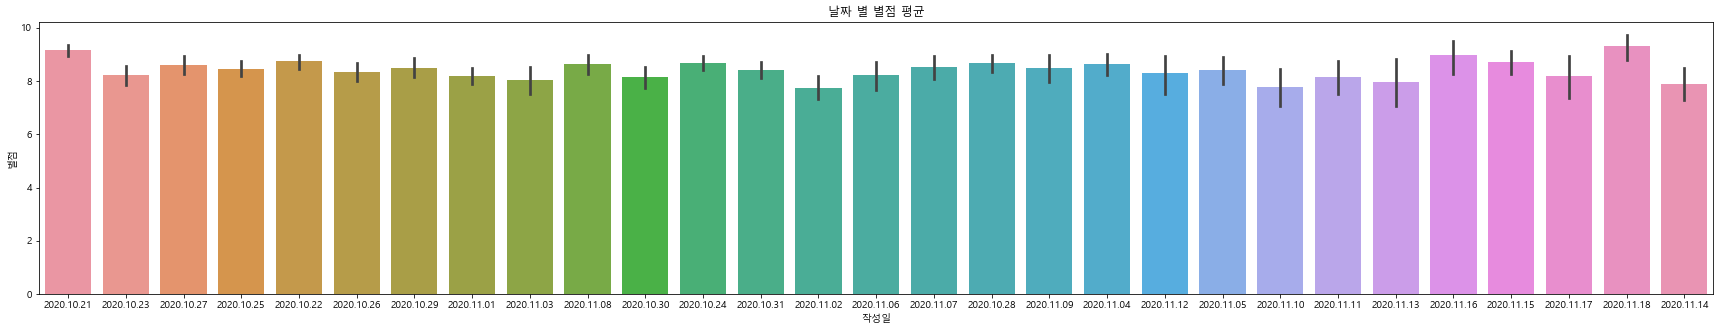

In [173]:
plt.figure(figsize=(30,5))
sns.barplot(y="별점",x='작성일', data=df2)
plt.title('날짜 별 별점 평균')
plt.show()

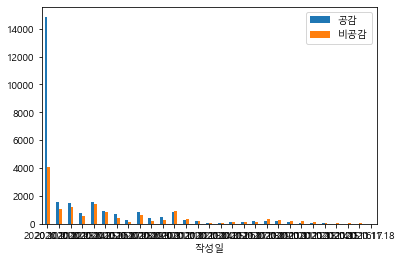

In [187]:
df2.groupby('작성일')['공감','비공감'].sum().plot.bar(rot=0)
plt.show()